<a href="https://colab.research.google.com/github/CuddlyPuppy/PracticePracticePractice/blob/master/irisPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(iris.data)

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X)
print("pca.components_: \n{}".format(pca.components_))

Z = pca.transform(X)
print("\nZ.shape: {}".format(Z.shape))

pca.components_: 
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]

Z.shape: (150, 2)


Text(0.5,1,'PCA scatterplot')

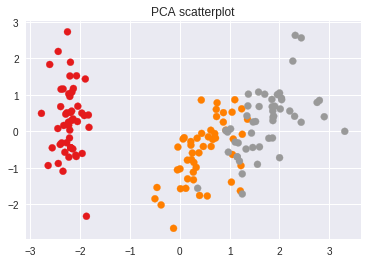

In [4]:
%matplotlib inline
plt.scatter(Z[:,0],Z[:,1], c = iris.target, cmap = plt.cm.Set1)
plt.title("PCA scatterplot")


Text(0.5,1,'PCA with k-means clustering')

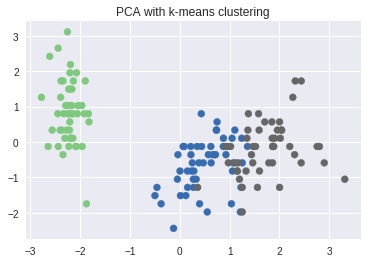

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state=0)

yclust = kmeans.fit_predict(X)

plt.scatter(Z[:,0], X[:,1], c = iris.target, cmap = plt.cm.Accent)
plt.title("PCA with k-means clustering")

In [6]:
from sklearn.decomposition import NMF

nmf = NMF(n_components = 2, random_state = 0)
Z2 = nmf.fit_transform(iris.data)

print(Z2.shape)

(150, 2)


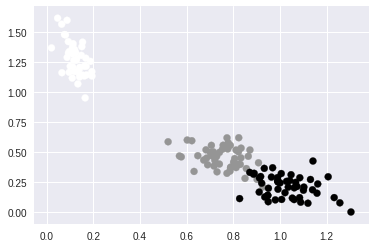

In [7]:
plt.scatter(Z2[:,0], Z2[:,1],
           c = iris.target)

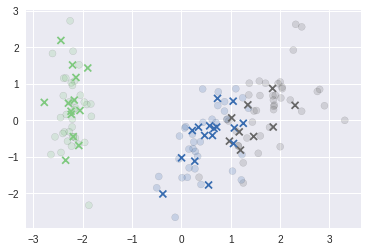

In [8]:
from sklearn.model_selection import train_test_split

Z_train, Z_test, y_train, y_test = train_test_split(Z, iris.target, random_state=0)

plt.scatter(Z_train[:,0], Z_train[:,1], c=y_train, cmap = plt.cm.Accent,
            edgecolors = 'k', marker ="o", alpha = 0.2 )
plt.scatter(Z_test[:,0], Z_test[:,1], c=y_test, cmap = plt.cm.Accent,
            edgecolors = 'k', marker = 'x')

In [9]:
from sklearn.linear_model import LogisticRegression

cls = LogisticRegression()
cls.fit(Z_train, y_train)

cls.predict(Z_test)

print(cls.score(Z_test, y_test))

0.8421052631578947


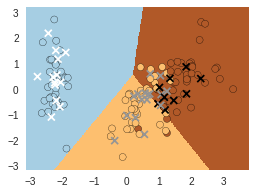

In [10]:
x_min, x_max = Z_train[:, 0].min() - .5, Z_train[:, 0].max() + .5
y_min, y_max = Z_train[:, 1].min() - .5, Z_train[:, 1].max() + .5
h = 0.02 # step size of the mesh

xx, yy = np.meshgrid(np.arange(x_min, x_max,h), np.arange(y_min,y_max,h))
Zmesh = cls.predict(np.c_[xx.ravel(),yy.ravel()])

Zmesh = Zmesh.reshape(xx.shape)
plt.figure(1,figsize=(4,3))
plt.pcolormesh(xx,yy, Zmesh, cmap = plt.cm.Paired)
plt.scatter(Z_train[:,0], Z_train[:,1], c=y_train, cmap = plt.cm.Paired,
            edgecolors='k', marker ="o" )
plt.scatter(Z_test[:,0], Z_test[:,1], c=y_test, marker = 'x')
